In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

## Načitanie dát

In [ ]:
dataset = pd.read_csv('../Data/final_dataset_3.csv')

## Dataset


In [ ]:
dataset.shape

(1951, 2)

In [ ]:
dataset.head()

,author_id,processed_text
0,168,travelers proceeded half dozen miles way horse...
1,168,large sums philip received playing might dazzl...
2,168,may state continued detective indirectly cause...
3,168,pretty soon deacon took hat cane went mrs hopk...
4,168,later day two friends began make inquiries ove...


In [ ]:
print((dataset['processed_text']).isnull().sum())

0


In [ ]:
print((dataset['author_id']).isnull().sum())

0


In [ ]:
dataset['word_count'] = dataset['processed_text'].apply(lambda x: len(x.split()))
dataset['char_count'] = dataset['processed_text'].apply(lambda x: len(x.replace(" ", "")))

average_word_count = dataset['word_count'].mean()
average_char_count = dataset['char_count'].mean()

print(f"Priemerný počet slov: {average_word_count}")
print(f"Priemerný počet znakov (bez medzier): {average_char_count}")

Priemerný počet slov: 6130.297283444387
Priemerný počet znakov (bez medzier): 36310.59507944644


In [ ]:
all_words_set = set()

for text in dataset['processed_text']:
    all_words_set.update(text.split())

total_unique_words = len(all_words_set)

print(f"Celkový počet unikátnych slov v datasete: {total_unique_words}")

Celkový počet unikátnych slov v datasete: 147645


In [ ]:
x = 5000
long_texts = dataset['processed_text'].apply(lambda text: len(text.split()) > x)

num_long_texts = long_texts.sum()

print(f"Počet vstupov s viac ako {x} slovami je: {num_long_texts}")

Počet vstupov s viac ako 5000 slovami je: 1202


In [ ]:
author_counts = dataset['author_id'].value_counts()
print(author_counts)

author_id
761     215
1800    160
8659    133
1285    131
3840    128
1032    100
1583     99
28       94
1865     94
333      92
1181     85
97       84
168      83
1626     74
3141     69
367      63
1057     63
113      63
213      62
127      59
Name: count, dtype: int64


In [ ]:
print('Počet autorov: ', len(dataset['author_id'].unique()))

Počet autorov:  20


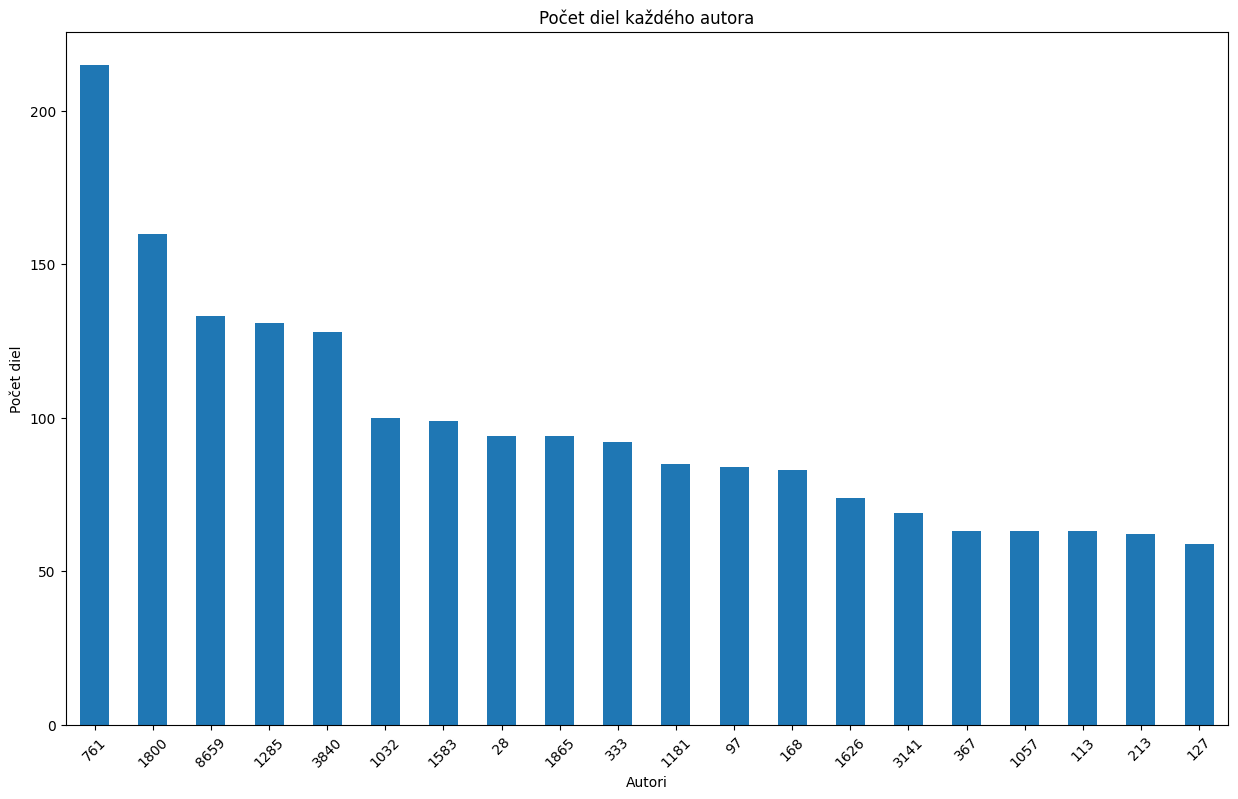

In [ ]:
plt.figure(figsize=(15, 9))
author_counts.plot(kind='bar')
plt.title('Počet diel každého autora')
plt.xlabel('Autori')
plt.ylabel('Počet diel')
plt.xticks(rotation=45)
plt.show()